# 第四讲：小世界网络

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
# 'serif', 'sans-serif', 'monospace', 'fantasy', 'cursive'
cnFont = {'fontname':'Songti SC', 'color':'darkred', 'weight':'bold', 'size': 30}
# plt.rcParams['figure.dpi'] = 400
import seaborn as sns
import scienceplots
import numpy as np
from scipy import stats
from scipy import optimize
import pandas as pd
from pandas import Series,DataFrame
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import networkx as nx
import powerlaw

## 小世界网络模型生成

In [2]:
n = 20
k = 4
color_list = ["red", "gray"]

### WS小世界网络的生成与可视化

Text(0.5, 1.0, 'random')

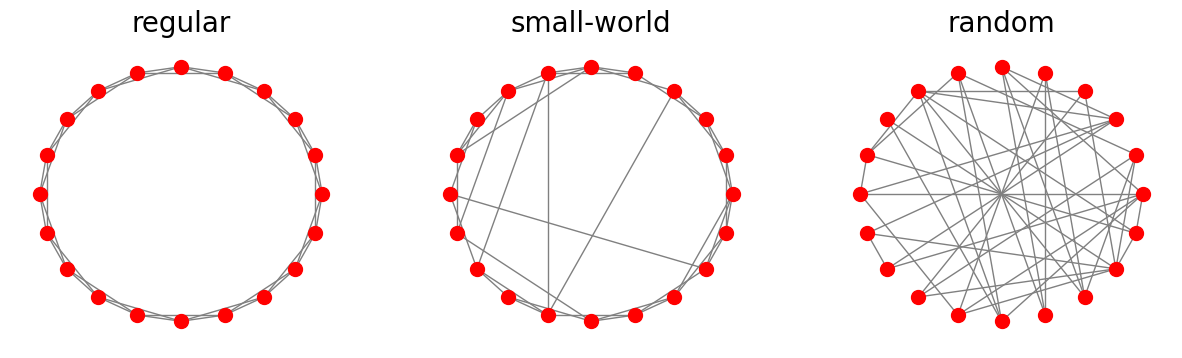

In [3]:
plt.figure(figsize=(15, 4))
# 绘制规则网络
p = 0
G1 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(131)
pos1 = nx.circular_layout(G1)
nx.draw(G1, pos1, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("regular", fontsize=20)

# 绘制WS小世界
p=0.2
G2 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(132)
pos2 = nx.circular_layout(G2)
nx.draw(G2, pos2, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("small-world", fontsize=20)


#绘制随机网络
p=1.0
G3 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(133)
pos3 = nx.circular_layout(G3)
nx.draw(G3, pos3, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("random", fontsize=20)

### NW小世界网络的生成与可视化

Text(0.5, 1.0, 'complete')

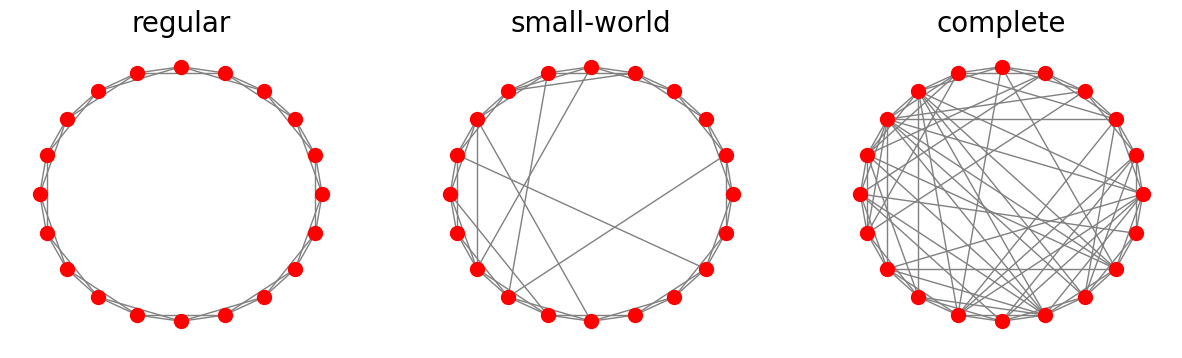

In [4]:
plt.figure(figsize=(15, 4))
# 绘制规则网络
p = 0
n = 20
k = 4
G1 = nx.watts_strogatz_graph(n, k, p)
plt.subplot(131)
pos1 = nx.circular_layout(G1)
nx.draw(G1, pos1, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("regular", fontsize=20)

# 绘制NW小世界
p=0.2
G2 = nx.newman_watts_strogatz_graph(n, k, p)
plt.subplot(132)
pos2 = nx.circular_layout(G2)
nx.draw(G2, pos2, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("small-world", fontsize=20)


#绘制完全网络：加边概率为1
p=1
G3 = nx.newman_watts_strogatz_graph(n, k, p)
# G3 = nx.complete_graph(n)
plt.subplot(133)
pos3 = nx.circular_layout(G3)
nx.draw(G3, pos3, node_size=100, node_color=color_list[0], edge_color=color_list[1])
plt.title("complete", fontsize=20)

## WS小世界网络的“小世界”与“高集聚”特性

In [5]:
# 设置初始参数
N, K = 1000, 10
samples = 10
p_rew = np.logspace(0,4,10)/10000
p_rew

array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00])

In [6]:
# 平均距离与平均集聚系数
C = []
CT = [] # 理论近似值：{[3(K-2)]/[4(K-1)]}*(1-p)^3
L = []
for p in p_rew:
    s1 = 0
    s2 = 0
    for i in range(samples):
        G = nx.watts_strogatz_graph(N, K, p)
        # 为了防止在计算平均距离时报错：最好改用生成连通WS小世界网络函数connected_watts_strogatz_graph()
        s1 += nx.average_clustering(G)
        s2 += nx.average_shortest_path_length(G)
    
    ct = (3*(K-2)/(4*(K-1)))*((1-p)**3)
    CT.append(ct)
    C.append(s1/samples)
    L.append(s2/samples)

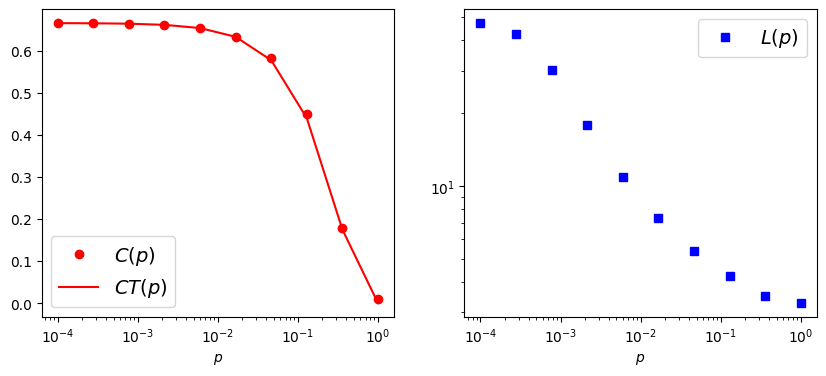

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(p_rew, C, 'ro', label='$C(p)$')
plt.plot(p_rew, CT, 'r-', label='$CT(p)$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")

plt.subplot(122)
plt.plot(p_rew, L, 'bs', label='$L(p)$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")
plt.yscale("log")

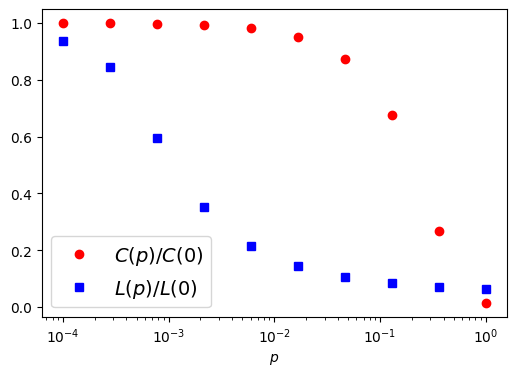

In [8]:
# 初始规则网络的平均集聚系数和平均距离
G0 = nx.watts_strogatz_graph(N, K, 0)
C0 = nx.average_clustering(G0)
L0 = nx.average_shortest_path_length(G0)
plt.figure(figsize=(6,4))
plt.plot(p_rew, np.array(C)/C0, 'ro', label='$C(p)/C(0)$')
plt.plot(p_rew, np.array(L)/L0, 'bs', label='$L(p)/L(0)$')
plt.legend(loc=0, fontsize=14)
plt.xlabel("$p$")
plt.xscale("log")